In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [38]:
titanic = pd.read_csv('train.csv')

In [39]:
titanic[['Age']].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


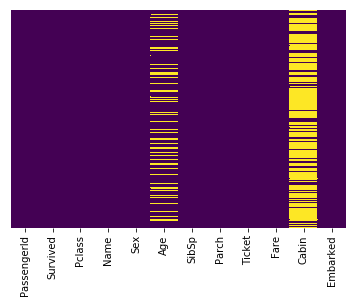

In [9]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

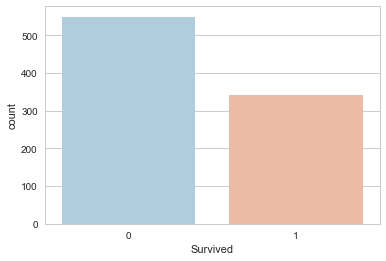

In [40]:
sns.countplot(x='Survived',data=titanic,palette='RdBu_r');

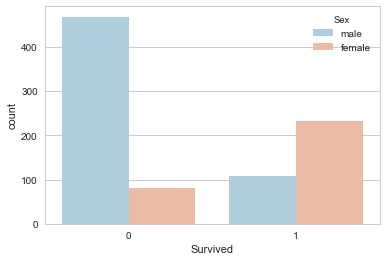

In [41]:
sns.countplot(x='Survived',hue='Sex',data=titanic,palette='RdBu_r');

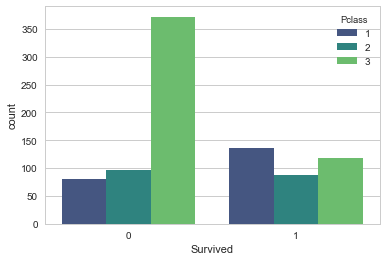

In [43]:
sns.countplot(x='Survived',hue='Pclass',data=titanic,palette='viridis');

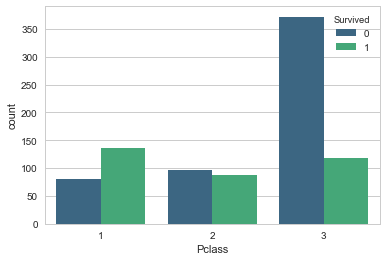

In [45]:
sns.countplot(x='Pclass',hue='Survived',data=titanic,palette='viridis');

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012BFE5A5BE0>]],
      dtype=object)

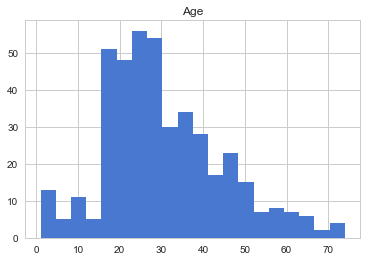

In [46]:
titanic[titanic.Survived == 0].hist("Age", bins=20)

In [16]:
titanic.Age = titanic.groupby('Pclass').Age.transform(lambda x: x.fillna(np.round(x.mean())))

In [91]:
# Extract titles from name
titanic['Title']=0
for i in df:
    titanic['Title']=titanic['Name'].str.extract('([A-Za-z]+)\.', expand=False)  # Use REGEX to define a search pattern

In [94]:
titanic[titanic.Title==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


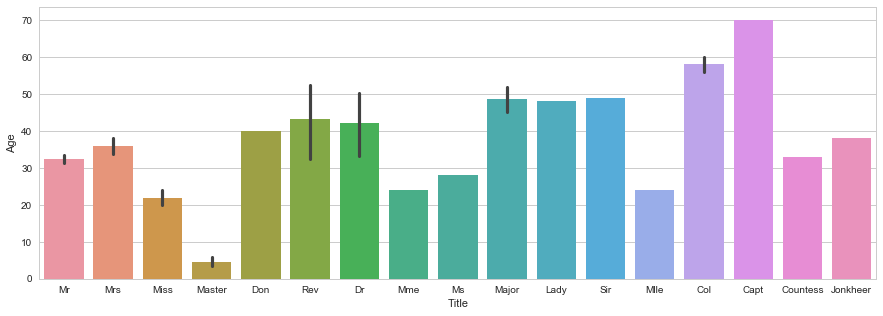

In [52]:
plt.figure(figsize=(15,5))
sns.barplot(x=titanic['Title'], y=titanic['Age']);

In [17]:
titanic_melted = pd.melt(titanic[['Survived', 'Age']], "Survived", var_name="Ages")

In [18]:
titanic_melted.head()

,Survived,Ages,value
0,0,Age,22.0
1,1,Age,38.0
2,1,Age,26.0
3,1,Age,35.0
4,0,Age,35.0


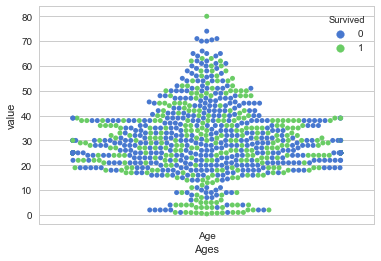

In [19]:
sns.swarmplot(x = 'Ages', y="value", hue="Survived", data=titanic_melted)

In [22]:
df = titanic.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [23]:
sex_conv = lambda x : 1 if x=='male' else 0 
df['Is_male'] = df['Sex'].apply(sex_conv)

In [27]:
df['Age'] =pd.cut(df['Age'], bins=[1, 12, 50, 200], labels=['Child','Adult','Elder'])

In [16]:
age_conv = lambda x : 1 if x<=7 else (2 if x<18 else (3 if x<30 else (4 if x<45 else (4 if x>=45 else 5))))  
df['Age_Group'] = df['Age'].apply(age_conv)

In [29]:
embarked_new = pd.get_dummies(df['Embarked'])
train = pd.concat([df[['PassengerId','Survived','Pclass','Sex', 
                       'Age', 'SibSp', 'Parch', 'Fare','Embarked','Is_male']], embarked_new], axis=1)

In [31]:
# Family size feature
df['FamilySize'] = df['SibSp'] + df['Parch']
df.drop('SibSp',axis=1,inplace=True)
df.drop('Parch',axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Is_male,FamilySize
0,1,0,3,male,Adult,7.2500,S,1,1
1,2,1,1,female,Adult,71.2833,C,0,1
2,3,1,3,female,Adult,7.9250,S,0,0
3,4,1,1,female,Adult,53.1000,S,0,1
4,5,0,3,male,Adult,8.0500,S,1,0


In [89]:
titanic = pd.read_csv('train.csv')
df = titanic.drop(['Ticket', 'Cabin'], axis=1)

#Converting Sex
sex_conv = lambda x : 1 if x=='male' else 0 
df['Is_male'] = df['Sex'].apply(sex_conv)

# Adding "Title" column
df['Title']=0
for i in df:
    df['Title']=df['Name'].str.extract('([A-Za-z]+)\.', expand=False)  

# Imputing Age  
df['Age'] = df.groupby('Title')['Age'].transform(lambda x: x.fillna(np.round(x.mean())))

# Converting Age
df['Age'] =pd.cut(df['Age'], bins=[1, 12, 50, 200], labels=['Child','Adult','Elder'])

# Adding Family column
df['FamilySize'] = df['SibSp'] + df['Parch']
df.drop('SibSp',axis=1,inplace=True)
df.drop('Parch',axis=1,inplace=True)

#Binilen limanları gruplandırma
embarked_new = pd.get_dummies(df['Embarked'])

train = pd.concat([df[['Survived','Pclass', 
                       'FamilySize','Fare',
                       'Is_male', 'Age']], embarked_new], axis=1)

X = train[['Is_male','Pclass', 'Age', "FamilySize"]]
y = train['Survived']